In [2]:
import pandas as pd

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FAC0-9EC2

 Directory of C:\Users\User\Documents\AIyapayzeka\Projects\Kaggle\20\Unsupervised Learning on Country Data

01.02.2023  01:47    <DIR>          .
01.02.2023  01:46    <DIR>          ..
01.02.2023  01:47    <DIR>          .ipynb_checkpoints
01.02.2023  01:46             9.229 Country-data.csv
01.02.2023  01:46               808 data-dictionary.csv
01.02.2023  01:47                72 Untitled.ipynb
               3 File(s)         10.109 bytes
               3 Dir(s)  53.744.979.968 bytes free


In [5]:
df = pd.read_csv("Country-data.csv")

In [6]:
df2 = pd.read_csv("data-dictionary.csv")

In [8]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
df2

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [10]:
from pycaret.clustering import *
s = setup(df, normalize = True)

,Description,Value
0,session_id,4945
1,Original Data,"(167, 10)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(167, 176)"
9,CPU Jobs,-1


In [11]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2517,50.6835,1.1906,0,0,0


In [12]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [22]:
plot_model(kmeans, plot = 'cluster')

In [23]:
plot_model(kmeans, plot = 'tsne')

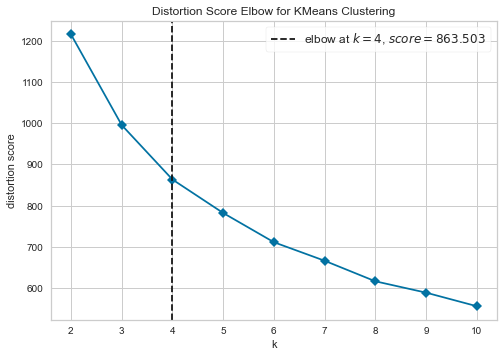

In [13]:
plot_model(kmeans, plot = 'elbow')

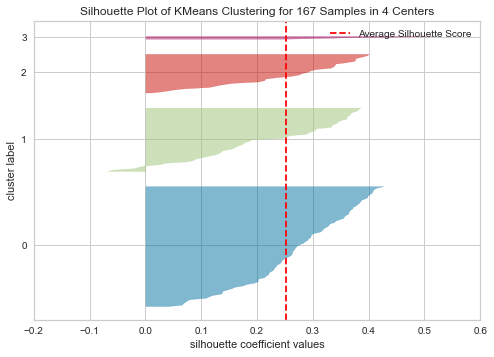

In [14]:
plot_model(kmeans, plot = 'silhouette')

In [15]:
result = assign_model(kmeans)
result.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,Cluster 2
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,Cluster 0
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,Cluster 1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,Cluster 1
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1040,Cluster 1


In [16]:
predictions = predict_model(kmeans, data = df)
predictions.sample(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,Cluster 0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.900,75.4,2.47,13500,Cluster 0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,Cluster 1
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,Cluster 0
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,Cluster 0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,Cluster 0
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.800,74.4,2.20,2810,Cluster 0
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,Cluster 0
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,Cluster 2
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,Cluster 1


In [1]:
###Saving Model

In [17]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [18]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['